#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import thư viện
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Import dữ liệu
df_reality = pd.read_csv("/content/drive/MyDrive/DAMH/Data/PreparedData/prepared_data_weather.csv")
df_predictions = pd.read_csv('/content/drive/MyDrive/DAMH/Data/PreparedData/df_predictions.csv')

#Chuyển kiểu dữ liệu cho df_reality
df_reality['Date'] = pd.to_datetime(df_reality['Date'])
df_reality['Time'] = df_reality['Time'].astype("string")
df_reality['DayOfWeek'] = df_reality['DayOfWeek'].astype("string")
df_reality['LowTemp'] = df_reality['LowTemp'].astype("float")
df_reality['HighTemp'] = df_reality['HighTemp'].astype("float")
df_reality['Barometer'] = df_reality['Barometer'].astype("float")
df_reality['WindDegrees'] = df_reality['WindDegrees'].astype("float")
df_reality['WeatherDescription'] = df_reality['WeatherDescription'].astype("string")

# Lọc dữ liệu 3 ngày đầu tiên của tháng 9-2023
df_reality_test = df_reality[(df_reality['Date'] >= '2023-09-01') & (df_reality['Date'] <= '2023-09-03')]
df_reality_test = df_reality_test.reset_index(drop=True)

# Lọc dữ liệu
df_reality = df_reality[['LowTemp', 'HighTemp', 'Humidity', 'Barometer', 'WindDegrees', 'WindSpeed', 'WeatherDescription']]

df_reality.info()
df_predictions.info()
df_reality_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LowTemp             18565 non-null  float64
 1   HighTemp            18565 non-null  float64
 2   Humidity            18565 non-null  float64
 3   Barometer           18565 non-null  float64
 4   WindDegrees         18565 non-null  float64
 5   WindSpeed           18565 non-null  float64
 6   WeatherDescription  18565 non-null  string 
dtypes: float64(6), string(1)
memory usage: 1015.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12 non-null     int64  
 1   LowTemp      12 non-null     float64
 2   HighTemp     12 non-null     float64
 3   Humidity     12 non-null     float64
 4   Barometer    12 non-null     float64
 

##Thử nghiệm mô hình thuật toán Decision Tree

In [ ]:
# Đọc dữ liệu và chọn các đặc trưng và biến mục tiêu
features = ['Barometer', 'Humidity', 'WindDegrees', 'LowTemp', 'HighTemp', 'WindSpeed']
target = 'WeatherDescription'

# Chọn các cột quan tâm
selected_df = df_reality[features + [target]]

# Mã hoá biến mục tiêu
le = LabelEncoder()
selected_df[target] = le.fit_transform(selected_df[target])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = selected_df[features]
y = selected_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình cây quyết định
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.5483436574198761
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.14      0.15       153
           1       0.06      0.06      0.06        18
           3       0.07      0.10      0.08        60
           4       0.00      0.00      0.00         2
           7       0.04      0.05      0.05        20
           9       0.00      0.00      0.00         3
          10       0.17      0.14      0.15         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.08      0.09      0.08        47
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         6
          20       0.00      0.00      0.00         1
          21       0.16      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

##Thử nghiệm thuật toán Hồi quy Logistic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Độ chính xác trên tập huấn luyện: 62.72%
Độ chính xác trên tập kiểm tra: 61.40%


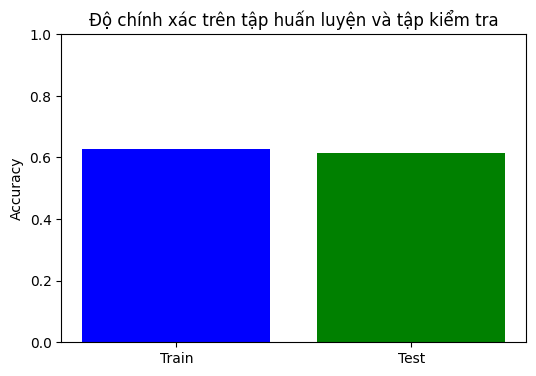

In [ ]:
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Sử dụng label encoder để mã hoá cột "WeatherDescription"
df_reality["WeatherDescription_encoded"] = label_encoder.fit_transform(df_reality["WeatherDescription"])

# Xác định biến độc lập (features) và biến phụ thuộc (target)
features = ["LowTemp", "HighTemp", "Barometer", "Humidity", "WindDegrees", "WindSpeed"]
target = "WeatherDescription_encoded"

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df_reality[features], df_reality[target], test_size=0.3, random_state=42)

# Tạo và huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Tính Độ chính xác trên tập huấn luyện và tập kiểm tra
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# In Độ chính xác trên tập huấn luyện và tập kiểm tra
print(f"Độ chính xác trên tập huấn luyện: {train_accuracy * 100:.2f}%")
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Vẽ biểu đồ Độ chính xác
accuracy_df = pd.DataFrame({'Dataset': ['Train', 'Test'], 'Accuracy': [train_accuracy, test_accuracy]})
plt.figure(figsize=(6, 4))
plt.bar(accuracy_df['Dataset'], accuracy_df['Accuracy'], color=['blue', 'green'])
plt.title('Độ chính xác trên tập huấn luyện và tập kiểm tra')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

##Thử nghiệm mô hình dự đoán RandomForestClassifier

In [ ]:
# Xác định biến độc lập (features) và biến phụ thuộc (target)
X = df_reality[['LowTemp', 'HighTemp', 'Barometer', 'Humidity', 'WindDegrees', 'WindSpeed']]
y = df_reality['WeatherDescription']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_rep)

Accuracy: 0.646646916240237
                                     precision    recall  f1-score   support

                      Broken clouds       0.28      0.12      0.17       153
                              Clear       0.00      0.00      0.00        18
                                Fog       0.12      0.05      0.07        60
                               Haze       0.00      0.00      0.00         2
          Light rain, Broken clouds       0.06      0.05      0.06        20
                    Light rain, Fog       0.00      0.00      0.00         3
   Light rain, More clouds than sun       0.00      0.00      0.00         7
          Light rain, Mostly cloudy       0.00      0.00      0.00         5
               Light rain, Overcast       0.00      0.00      0.00         2
          Light rain, Partly cloudy       0.17      0.15      0.16        47
           Light rain, Partly sunny       0.00      0.00      0.00         2
         Light rain, Passing clouds       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

###Sử dụng mô hình Random Forest Classifier để dự đoán thời tiết qua các biến độc lập đã được dự đoán qua mô hình LSTM


In [ ]:
# Chuẩn bị dữ liệu đầu vào từ df_predictions
X_predictions = df_predictions[['LowTemp', 'HighTemp', 'Barometer', 'Humidity', 'WindDegrees', 'WindSpeed']]

# Sử dụng mô hình đã huấn luyện để dự đoán WeatherDescription cho dữ liệu mới
predictions = model.predict(X_predictions)
df_predictions['PredictedWeather'] = predictions
df_predictions['PredictedWeather'] = df_predictions['PredictedWeather'].astype("string")
df_predictions

,Unnamed: 0,LowTemp,HighTemp,Humidity,Barometer,WindDegrees,WindSpeed,PredictedWeather
0,0,23.342674,27.330822,55.539875,906.59520,125.372010,4.021903,Passing clouds
1,1,23.356783,27.351372,55.679134,906.64950,126.356800,4.023765,Passing clouds
2,2,28.255370,32.231830,75.943350,957.67460,223.322020,7.158934,Scattered clouds
3,3,23.497911,27.506037,56.258507,908.26590,128.891820,4.113182,Passing clouds
4,4,24.550472,28.553467,60.654240,919.30005,149.726410,4.784765,Passing clouds
5,5,23.863607,27.857826,57.824270,912.22040,135.685910,4.340875,Passing clouds
6,6,22.482840,26.513450,51.744545,897.22210,108.765205,3.534368,Passing clouds
7,7,22.347036,26.343817,51.390285,896.01690,106.133705,3.394479,Passing clouds
8,8,23.080850,27.088170,54.448586,903.94885,120.235050,3.876851,Passing clouds
9,9,21.967411,25.978083,49.924090,892.46484,98.219826,3.154709,Passing clouds


###So sánh kết quả dự đoán với kết quả thực tế

In [ ]:
df_train_test = pd.DataFrame()
df_train_test['WeatherDescription Dự đoán'] = df_predictions['PredictedWeather']
df_train_test['WeatherDescription Thực tế'] = df_reality_test['WeatherDescription']
df_train_test

,WeatherDescription Dự đoán,WeatherDescription Thực tế
0,Passing clouds,Passing clouds
1,Passing clouds,Partly sunny
2,Scattered clouds,Broken clouds
3,Passing clouds,Passing clouds
4,Passing clouds,Passing clouds
5,Passing clouds,Passing clouds
6,Passing clouds,Partly sunny
7,Passing clouds,Broken clouds
8,Passing clouds,Passing clouds
9,Passing clouds,Partly sunny
